<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Louvain-Modularity-Algorithm-on-Amazon-product-co-purchasing-dataset" data-toc-modified-id="Louvain-Modularity-Algorithm-on-Amazon-product-co-purchasing-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Louvain Modularity Algorithm on Amazon product co-purchasing dataset</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Read-in-dataset" data-toc-modified-id="Read-in-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read in dataset</a></span><ul class="toc-item"><li><span><a href="#Read-edgelist" data-toc-modified-id="Read-edgelist-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Read edgelist</a></span></li><li><span><a href="#Read-in-ground-truth" data-toc-modified-id="Read-in-ground-truth-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Read in ground-truth</a></span></li></ul></li></ul></li><li><span><a href="#Deploy-Algorithm" data-toc-modified-id="Deploy-Algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Deploy Algorithm</a></span><ul class="toc-item"><li><span><a href="#Create-networkX-graph" data-toc-modified-id="Create-networkX-graph-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create networkX graph</a></span></li><li><span><a href="#Compute-best-partition" data-toc-modified-id="Compute-best-partition-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Compute best partition</a></span></li><li><span><a href="#Get-all-communities" data-toc-modified-id="Get-all-communities-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Get all communities</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Inspect-communities" data-toc-modified-id="Inspect-communities-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Inspect communities</a></span></li><li><span><a href="#Calculate-NF1-&amp;-other-stats" data-toc-modified-id="Calculate-NF1-&amp;-other-stats-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Calculate NF1 &amp; other stats</a></span></li><li><span><a href="#Plot-graph" data-toc-modified-id="Plot-graph-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot graph</a></span></li><li><span><a href="#Merge-analysis-with-product-metadata-(Note:-Analysis-done-on-InfoMap,-best-performing-algorithm)" data-toc-modified-id="Merge-analysis-with-product-metadata-(Note:-Analysis-done-on-InfoMap,-best-performing-algorithm)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Merge analysis with product metadata (Note: Analysis done on InfoMap, best performing algorithm)</a></span></li></ul></li></ul></div>

# Louvain Modularity Algorithm on Amazon product co-purchasing dataset

## Import libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import pandas as pd
import numpy as np
import re
from nf1 import NF1

## Read in dataset

**Note: Set path accordingly and ensure data files are in the associated path** 

### Read edgelist 

In [2]:
path = 'C:/Users/Simon/Desktop/CS5344 Group Project/'
df = pd.read_csv(path + 'data_files/com-amazon.ungraph.txt', header = None, delimiter = '\t')

In [3]:
# Check if edgelist file is read correctly 
df.head(15)

,0,1
0,1,88160
1,1,118052
2,1,161555
3,1,244916
4,1,346495
5,1,444232
6,1,447165
7,1,500600
8,2,27133
9,2,62291


In [4]:
df.shape

(925872, 2)

### Read in ground-truth

**Ground truth has a total of 75149 communities**

**Top 5000 communities found to have only 1517 communities instead (duplicates removed) of 5000 as reported by dataset**  

**All communities:**

In [7]:
# Read in ground truth (all communities)
all_cmty_list = []
all_cmty_df = pd.read_csv(path + 'data_files/com-amazon.all.dedup.cmty.txt',header = None)
all_cmty_df.shape

(75149, 1)

In [8]:
# Ensure no duplicates
all_cmty_df.drop_duplicates().shape

(75149, 1)

In [9]:
# Convert to tuples in a list format (to allow for nf1 calculation)
for row in range(len(all_cmty_df)):
    all_cmty_list.append(tuple(all_cmty_df[0].iloc[row].split('\t')))

## Cast to integer    
for pos in range(len(all_cmty_list)):
    all_cmty_list[pos] = tuple(pd.to_numeric(all_cmty_list[pos], downcast = 'integer'))

## Not necessary
"""
## Cast to tuple within a tuple format
all_cmty_tuple = re.sub(r'[\[\]]', '', str(all_cmty_list))

## Write to .txt file if necessary
with open("all_cmty_groundtruth.txt", "w") as output:
    output.write(str(all_cmty_tuple))

## lit eval for nf1 calculation
tup_ground = literal_eval(all_cmty_tuple)
"""

'\n## Cast to tuple within a tuple format\nall_cmty_tuple = re.sub(r\'[\\[\\]]\', \'\', str(all_cmty_list))\n\n## Write to .txt file if necessary\nwith open("all_cmty_groundtruth.txt", "w") as output:\n    output.write(str(all_cmty_tuple))\n\n## lit eval for nf1 calculation\ntup_ground = literal_eval(all_cmty_tuple)\n'

In [10]:
# Sort tuples of product id in ascending order (all ground-truth communities)
all_cmty_list_sorted = []
for tup in all_cmty_list:
    all_cmty_list_sorted.append(tuple(sorted(tup)))
len(all_cmty_list_sorted)

75149

**Top 1517 communities:**

In [11]:
# Read in ground truth (top 5k)
top5k_cmty_list = []
top5k_cmty_df = pd.read_csv(path + 'data_files/com-amazon.top5000.cmty.txt',header = None)
top5k_cmty_df.shape

(5000, 1)

In [12]:
# Ensure no duplicates
top5k_cmty_df.drop_duplicates(inplace= True)

In [13]:
# Check shape
top5k_cmty_df.shape

(1517, 1)

In [14]:
# Convert to tuples in a list format (to allow for nf1 calculation)
for row in range(len(top5k_cmty_df)):
    top5k_cmty_list.append(tuple(top5k_cmty_df[0].iloc[row].split('\t')))

## Cast to integer
for pos in range(len(top5k_cmty_list)):
    top5k_cmty_list[pos] = tuple(pd.to_numeric(top5k_cmty_list[pos], downcast = 'integer'))

In [16]:
# Sort tuples of product id in ascending order (top 1517 ground-truth communities)
top5k_cmty_list_sorted = []
for tup in top5k_cmty_list:
    top5k_cmty_list_sorted.append(tuple(sorted(tup)))
len(top5k_cmty_list_sorted)    

1517

In [128]:
top5k_cmty_list_sorted

[(164985, 225214, 232761),
 (105089, 282815, 331787),
 (167906, 288975, 421279, 442612, 451312),
 (69880, 231953, 518997, 523128),
 (135499, 160294, 304770),
 (112813, 112814, 112821, 112823),
 (199372, 399560, 447268, 471226, 522928),
 (179001, 391697, 412528),
 (21166, 207188, 405926, 531532, 540207),
 (118948, 191846, 209822, 455700, 482725),
 (55727, 78359, 170327, 335007),
 (12147, 73388, 178783, 269070, 439998),
 (24632, 82995, 156987, 236045, 280502),
 (42888, 58675, 217362, 260685),
 (4092, 104191, 128901, 341575, 389644, 413419),
 (246337, 301834, 353399, 497007, 533982),
 (213603, 213604, 213613, 213615, 213617, 249025),
 (219649, 233695, 337976, 337981, 444709, 499056),
 (99505, 126694, 133115, 264885, 502972, 522555),
 (75000, 156489, 207684, 278335, 321867, 388736),
 (348108, 372238, 396166, 415253, 443821, 492595),
 (124, 243477, 302516, 318491, 320027, 366784),
 (12526, 33054, 346440, 501788, 538991),
 (147735, 169543, 219957, 284749, 346229, 461219),
 (30704, 100579, 10

# Deploy Algorithm 

## Create networkX graph 

In [17]:
#G_fb = nx.read_edgelist("cs5344_friendster_ungraph.txt", create_using = nx.Graph(), nodetype = int, delimiter= '\t')
G = nx.read_edgelist(path + 'data_files/com-amazon.ungraph.txt',
                     create_using = nx.Graph(), nodetype = int, delimiter= '\t')

In [18]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 334863
Number of edges: 925872
Average degree:   5.5299


## Compute best partition

In [19]:
# Compute the best partition
%time partition = community_louvain.best_partition(G)

Wall time: 9min 13s


## Get all communities 

In [20]:
# Get all the communities for the louvain method
node_comm = []
for com in set(partition.values()) :                            #iterating through communities
    list_nodes = [nodes for nodes in partition.keys()           #iterating through all nodes
                                if partition[nodes] == com]
    node_comm.append(tuple(list_nodes))

## Not necessary
"""
## Convert to tuple within tuple format
node_comm_sub = re.sub('[\[\]]', '', str(node_comm))

## Write to .txt file if necessary
with open("louvain_cmty.txt", "w") as output:
    output.write(str(node_comm_sub))

## lit eval for nf1 calculation
from ast import literal_eval
tup_louv = literal_eval(node_comm_sub)
"""

'\n## Convert to tuple within tuple format\nnode_comm_sub = re.sub(\'[\\[\\]]\', \'\', str(node_comm))\n\n## Write to .txt file if necessary\nwith open("louvain_cmty.txt", "w") as output:\n    output.write(str(node_comm_sub))\n\n## lit eval for nf1 calculation\nfrom ast import literal_eval\ntup_louv = literal_eval(node_comm_sub)\n'

In [21]:
# Sort tuples of product id in ascending order (communities identified)
node_comm_sorted = []
for tup in node_comm:
    node_comm_sorted.append(tuple(sorted(tup)))
len(node_comm_sorted)

234

# Analysis

In [23]:
# Define function to check intersection of communities with ground truth
def intersection(list1, list2): 
    list3 = [tup for tup in list1 if tup in list2] 
    return list3

## Inspect communities 

In [24]:
# Check correctly identified communities with all ground-truth communities
len(intersection(node_comm_sorted, all_cmty_list_sorted))

9

In [25]:
# Check correctly identified communities with top 1517 ground-truth communities

## Not necessary
"""
## using set method
len(set(node_comm_sorted).intersection(set(top5k_cmty_list_sorted)))
"""

'\n## using set method\nlen(set(node_comm_sorted).intersection(set(top5k_cmty_list_sorted)))\n'

In [26]:
## using list method
len(intersection(node_comm_sorted, top5k_cmty_list_sorted))

8

In [29]:
# Display communities correctly identified (top 1517 ground-truth communities)
cor_cmty_identified =  intersection(node_comm_sorted, top5k_cmty_list_sorted)
                     #set(node_comm_sorted).intersection(set(top5k_cmty_list_sorted))
cor_cmty_identified[0] #displays 1st correctly identified community

(852,
 2556,
 2613,
 2917,
 49336,
 70350,
 90820,
 103626,
 127358,
 150211,
 160859,
 170622,
 196298,
 218600,
 222789,
 224305,
 292251,
 307273,
 329483,
 330153,
 358490,
 367698,
 407147,
 409740,
 420580,
 424145,
 444965,
 448512,
 449645,
 473660,
 513011,
 517958,
 524313)

In [30]:
# Check wrongly identified communities with top 1517 ground-truth communities
len(set(node_comm_sorted).difference(set(top5k_cmty_list_sorted)))

226

## Calculate NF1 & other stats

**Other stats**

In [32]:
mod = community_louvain.modularity(partition,G)
print("modularity:", mod)

modularity: 0.9261676823033705


In [33]:
density = nx.density(G)
print("Network density:", density)

Network density: 1.6513834036534368e-05


In [34]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.20522444916452579


**All communities:**

In [35]:
nf = NF1(node_comm_sorted, all_cmty_list_sorted)
results = nf.summary()
print(results['scores'])
print(results['details'])

                                 Value
Index                                 
Ground Truth Communities  75149.000000
Identified Communities      234.000000
Community Ratio               0.003114
Ground Truth Matched          0.001171
Node Coverage                 1.055704
NF1                           0.000104
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0     0.0     1.0  0.235418      0.0  0.320183


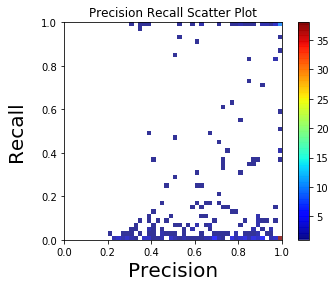

In [36]:
nf.plot()

**Top 1517 communities:** 

In [37]:
nf = NF1(node_comm_sorted, top5k_cmty_list_sorted)
results = nf.summary()
print(results['scores'])
print(results['details'])

                                Value
Index                                
Ground Truth Communities  1517.000000
Identified Communities     234.000000
Community Ratio              0.154252
Ground Truth Matched         0.141727
Node Coverage               20.032484
NF1                          0.030204
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0     0.0     1.0  0.231944     0.01  0.325832


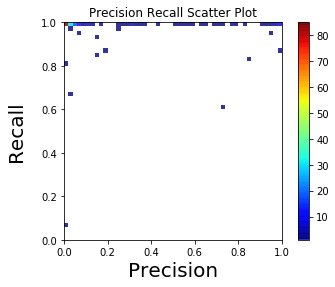

In [38]:
nf.plot()

## Plot graph 

**Note: Codes commented out as it takes ~2days**

In [39]:
# Plot communities takes very long
"""
import time
t = time.process_time()
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

plt.axis("off")
nx.draw_networkx(G, pos = pos, with_labels = False, node_size =20)

elapsed_time = time.process_time() - t
"""

'\nimport time\nt = time.process_time()\n#drawing\nsize = float(len(set(partition.values())))\npos = nx.spring_layout(G)\ncount = 0.\nfor com in set(partition.values()) :\n    count = count + 1.\n    list_nodes = [nodes for nodes in partition.keys()\n                                if partition[nodes] == com]\n    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,\n                                node_color = str(count / size))\nnx.draw_networkx_edges(G, pos, alpha=0.5)\nplt.show()\n\nplt.axis("off")\nnx.draw_networkx(G, pos = pos, with_labels = False, node_size =20)\n\nelapsed_time = time.process_time() - t\n'

## Merge analysis with product metadata (Note: Analysis done on InfoMap, best performing algorithm)

**Note: Products found to have no available metadata or zero co-purchased items are dropped** 

In [40]:
amazon_product_metadata = pd.read_csv(path + 'data_files/amazon_product_metadata.csv')

In [41]:
amazon_product_metadata = amazon_product_metadata.drop('Unnamed: 0', axis =1)
amazon_product_metadata.head()

,Id,ASIN,Title,Categories,Group,Copurchased,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff
0,1,0827229534,Patterns of Preaching: A Sermon Sampler,spiritu clergi book sermon preach subject chri...,Book,0804215715 156101074X 0687023955 0687074231 08...,396585,2,5.0,8,0.80
1,2,0738700797,Candlemas: Feast of Flames,spiritu book earth wicca subject witchcraft re...,Book,0738700827 1567184960 1567182836 0738700525 07...,168596,12,4.5,9,0.85
2,3,0486287785,World War II Allied Fighter Planes Trading Cards,hobbi home garden book subject general craft,Book,NaN,1270652,1,5.0,0,0.00
3,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,translat new guid life general christian studi...,Book,0842328130 0842330313 0842328610 0842328572,631289,1,4.0,6,0.79
4,5,1577943082,Prayers That Avail Much for Business: Executive,busi spiritu worship live book subject christi...,Book,157794349X 0892749504 1577941829 0892749563,455160,0,0.0,4,1.00


In [42]:
amazon_product_metadata[amazon_product_metadata.Id == 443]

,Id,ASIN,Title,Categories,Group,Copurchased,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff
353,443,1563897431,"World's Finest Comics Archives, Vol. 2 (DC Arc...",publish comic fiction novel fantasi book dc gr...,Book,1563894882 1563899329 1563897253 1563898195,508580,0,0.0,5,0.68


In [43]:
amazon_product_metadata[amazon_product_metadata.Id == 443].Categories.to_list()

['publish comic fiction novel fantasi book dc graphic subject general superhero scienc']